# AutoBound Quickstart

This notebooks shows how to use AutoBound to compute upper and lower bounds on a function.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/google/autobound/blob/main/autobound/notebooks/quickstart.ipynb)

## Install autobound

In [ ]:
%pip install autobound

## Compute upper and lower bounds on a function

In [ ]:
import autobound.jax as ab
import jax.numpy as jnp

f = lambda x: 1.5*jnp.exp(3*x) - 25*x**2
x0 = .5
trust_region = (0, 1)
# Compute quadratic upper and lower bounds on f.
bounds = ab.taylor_bounds(f, max_degree=2)(x0, trust_region)
bounds.coefficients  # == (f(x0), f'(x0), <an interval>)

(Array(0.47253323, dtype=float32, weak_type=True),
 Array(-4.8324013, dtype=float32, weak_type=True),
 (Array(-5.5549355, dtype=float32, weak_type=True),
  Array(28.287888, dtype=float32, weak_type=True)))

## Plot the bounds using matplotlib

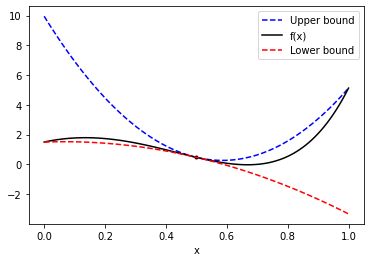

In [5]:
from matplotlib import pyplot
import numpy as np


def plot_bounds(bounds, num_points=101):
  a, b = bounds.x_trust_region
  xs = np.linspace(a, b, num_points)
  pyplot.xlabel('x')
  pyplot.plot(xs, [bounds.upper(x) for x in xs], 'b--', label='Upper bound')
  pyplot.plot(xs, [bounds.f(x) for x in xs], 'k-', label='f(x)')
  pyplot.plot([x0], [bounds.f(bounds.x0)], 'k.')
  pyplot.plot(xs, [bounds.lower(x) for x in xs], 'r--', label='Lower bound')
  pyplot.legend()
  pyplot.show()


plot_bounds(bounds)